In [1]:
!pip install keras

In [2]:
import keras
import numpy as np

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, DepthwiseConv2D, Input, Dropout, SeparableConv2D
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [6]:
print (X_train.shape)
print (X_train[667][20])


(60000, 28, 28)
[  0   0   0   0   0 128 255 255 255 255 255 255 255 255 191 128   0   0
   0   0   0   0   0   0   0   0   0   0]


(60000, 28, 28)


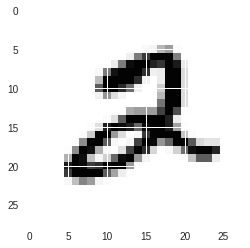

In [7]:
print (X_train.shape)
plt.imshow(X_train[5])

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print (X_train.shape)
print (X_train[667][20])

(60000, 28, 28, 1)
[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [128]
 [255]
 [255]
 [255]
 [255]
 [255]
 [255]
 [255]
 [255]
 [191]
 [128]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
print (X_train[667][20])

[[0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.5019608]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [0.7490196]
 [0.5019608]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.       ]]


In [11]:
print (y_train[30])
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print (Y_train.shape)
print (Y_train[30])

3
(60000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [28]:
import random
random.seed(3)

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape = (28, 28, 1) ))
model.add(Conv2D(32, (3, 3), activation= 'relu'))
model.add(Dropout(0.4))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(16, (3, 3), activation= 'relu'))
model.add(Conv2D(32, (3, 3), activation= 'relu'))
model.add(Conv2D(32, (3, 3), activation= 'relu'))
model.add(Dropout(0.6))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(10, (1, 1), activation='relu'))
model.add(Conv2D(10, (2, 2)))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax')) #model.add(Activation('softmax')) #Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 6, 6, 32)          9248      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
model.fit(x=X_train, y=Y_train, batch_size = 128, epochs = 10)
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 24s 402us/step - loss: 0.4863 - acc: 0.8407
Epoch 2/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.1272 - acc: 0.9609
Epoch 3/10
  896/60000 [..............................] - ETA: 27s - loss: 0.1088 - acc: 0.9621

60000/60000 [==============================] - 23s 376us/step - loss: 0.0895 - acc: 0.9729
Epoch 4/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0715 - acc: 0.9774
Epoch 5/10
 5632/60000 [=>............................] - ETA: 20s - loss: 0.0741 - acc: 0.9771

60000/60000 [==============================] - 23s 382us/step - loss: 0.0620 - acc: 0.9810
Epoch 6/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.0543 - acc: 0.9836
Epoch 7/10
 7040/60000 [==>...........................] - ETA: 19s - loss: 0.0452 - acc: 0.9845

60000/60000 [==============================] - 22s 373us/step - loss: 0.0468 - acc: 0.9855
Epoch 8/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.0440 - acc: 0.9860
Epoch 9/10
 8064/60000 [===>..........................] - ETA: 18s - loss: 0.0399 - acc: 0.9865

60000/60000 [==============================] - 23s 375us/step - loss: 0.0402 - acc: 0.9873
Epoch 10/10
60000/60000 [==============================] - 23s 375us/step - loss: 0.0382 - acc: 0.9881


In [31]:
score = model.evaluate(X_test, Y_test)
print (score)

10000/10000 [==============================] - 3s 338us/step
[0.07728573571443557, 0.9918]


In [30]:
# manual test
y_pred = model.predict(X_test)
print(np.argmax(y_pred[:9], axis = 1))
print(y_test[:9])

[7 2 1 0 4 1 4 9 5]
[7 2 1 0 4 1 4 9 5]
